In [60]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Reading the File

In [26]:
loan_data= pd.read_csv("loan.csv")

# Data Exploration

In [29]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [30]:
loan_data.shape #Total rows and columns

(39717, 111)

In [32]:
loan_data.info() # to check the data type of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [54]:
loan_data.describe()

,loan_amnt,funded_amnt_inv,installment,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,total_acc
count,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000
mean,11047.025430,10222.481123,322.466318,6.877797e+04,13.272727,0.871737,9.275423,0.055422,22.052648
std,7348.441646,7022.720644,208.639215,6.421868e+04,6.673044,1.071546,4.401588,0.237804,11.425861
min,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,2.000000,0.000000,2.000000
25%,5300.000000,5000.000000,165.740000,4.000000e+04,8.130000,0.000000,6.000000,0.000000,13.000000
50%,9600.000000,8733.440000,277.860000,5.886800e+04,13.370000,1.000000,9.000000,0.000000,20.000000
75%,15000.000000,14000.000000,425.550000,8.200000e+04,18.560000,1.000000,12.000000,0.000000,29.000000
max,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,8.000000,44.000000,4.000000,90.000000


In [31]:
loan_data.isnull().sum() # total null columns

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

# Data Cleaning

### Observations to drop NA values in the columns

In [33]:
loan_data.dropna(axis = 1, how = 'all', inplace = True) # used to drop all clumns with NA value


In [35]:
loan_data.head() #validating the dataset

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


# Removing Single Value Column

In [39]:
loan_data.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt',], axis = 1, inplace = True)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


In [42]:
#More irrelevant columns 
loan_data.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)


In [43]:
loan_data.shape

(39717, 21)

#### Goal is for either fully paid or charged off loans.

In [44]:
loan_data = loan_data[loan_data.loan_status != "Current"]
loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [45]:
loan_data.isna().sum() # check missing values

loan_amnt                 0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1033
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_util               50
total_acc                 0
dtype: int64

In [46]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt_inv      38577 non-null  float64
 2   term                 38577 non-null  object 
 3   int_rate             38577 non-null  object 
 4   installment          38577 non-null  float64
 5   grade                38577 non-null  object 
 6   sub_grade            38577 non-null  object 
 7   emp_length           37544 non-null  object 
 8   home_ownership       38577 non-null  object 
 9   annual_inc           38577 non-null  float64
 10  verification_status  38577 non-null  object 
 11  issue_d              38577 non-null  object 
 12  loan_status          38577 non-null  object 
 13  purpose              38577 non-null  object 
 14  dti                  38577 non-null  float64
 15  earliest_cr_line     38577 non-null 

In [52]:
loan_data['emp_length'].mode()[0]
loan_data.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [53]:
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37
5,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,...,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.30%,12


# Data Visualization

C:\Users\Siddarth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_inc'>

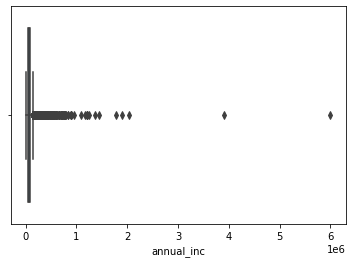

In [59]:
sns.boxplot(loan_data['annual_inc'])

In [61]:
quantile_info = loan_data.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

In [62]:
per_95_annual_inc = loan_data['annual_inc'].quantile(0.95)
loan_data = loan_data[loan_data.annual_inc <= per_95_annual_inc]

<AxesSubplot:xlabel='annual_inc'>

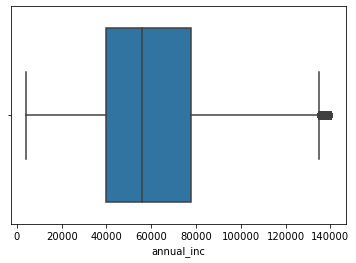

In [63]:
sns.boxplot(loan_data.annual_inc)

<AxesSubplot:xlabel='annual_inc', ylabel='Density'>

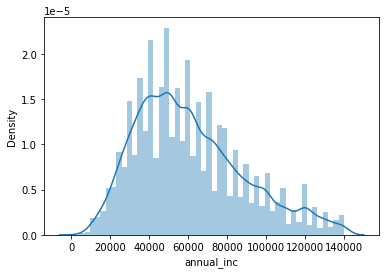

In [65]:
sns.distplot(loan_data.annual_inc)

# Categorize data

<AxesSubplot:xlabel='loan_status', ylabel='count'>

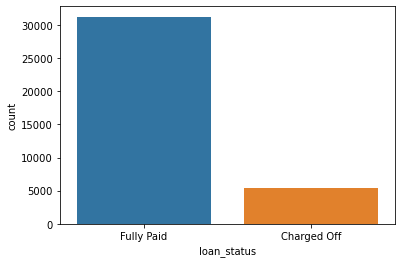

In [70]:
sns.countplot(x = 'loan_status', data = loan_data)

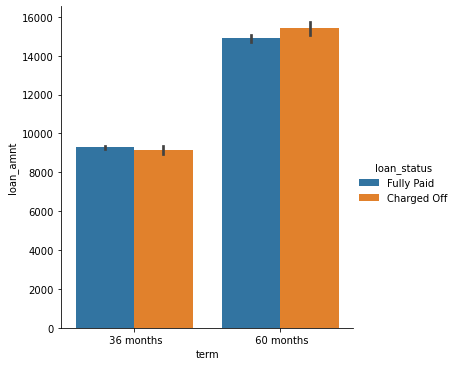

In [72]:
sns.catplot(x = 'term', y = 'loan_amnt', data = loan_data,hue = 'loan_status', kind = 'bar')

In [78]:
loan_data.sub_grade = pd.to_numeric(loan_data.sub_grade.apply(lambda x : x[-1]))
loan_data.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

<AxesSubplot:xlabel='grade', ylabel='count'>

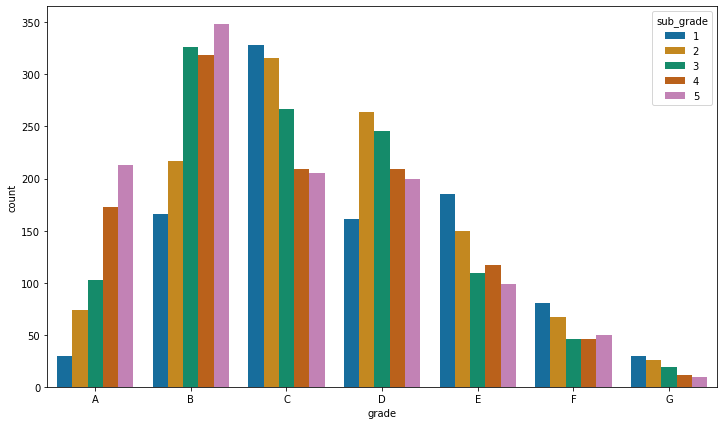

In [79]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan_data[loan_data.loan_status == 'Charged Off'])